### Importo le librerie

In [54]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

### Importo il file dei dati da github e guardo le prime righe


In [55]:
url = 'https://raw.githubusercontent.com/vincenzosardone/test/master/covid_data.csv'
df = pd.read_csv(url)
df.head(5)

date        state  region  cases
0  22-01-20  Afghanistan    Asia      0
1  22-01-20      Albania  Europe      0
2  22-01-20      Algeria  Africa      0
3  22-01-20      Andorra  Europe      0
4  22-01-20       Angola  Africa      0

### Ri-arrangio i dati in modo tale che per ogni data scelta si abbiamo le nazioni ordinate in modo decrescente per il numero totale di casi

In [56]:
dff = df[df['date'].eq('27-03-20')].sort_values(by='cases', ascending=False).head(10)
dff

date           state    region   cases
11400  27-03-20              US  Americas  101657
11321  27-03-20           Italy    Europe   86498
11277  27-03-20           China      Asia   81897
11382  27-03-20           Spain    Europe   65719
11304  27-03-20         Germany    Europe   50871
11300  27-03-20          France    Europe   33402
11317  27-03-20            Iran      Asia   32332
11398  27-03-20  United Kingdom    Europe   14745
11387  27-03-20     Switzerland    Europe   12928
11327  27-03-20    Korea, South      Asia    9332

### Primo plot

--------------------------
Top 10

<BarContainer object of 10 artists>

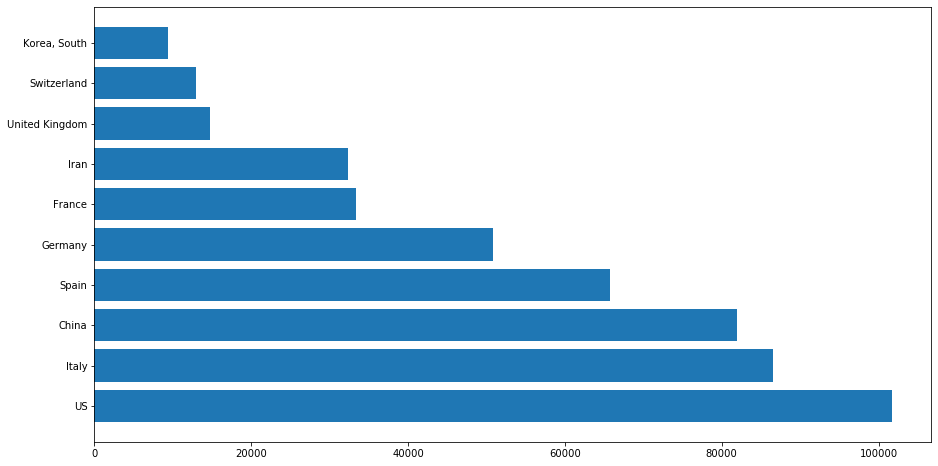

In [57]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['state'], dff['cases'])

### Le nazioni sono raggruppate per macro-regioni, assegno ad ognuna di esse un colore

In [58]:
colors = dict(zip(
    ["Americas","Europe","Asia","Africa","Oceania"],
    ["#adb0ff", "#e48381", "#90d595", "#f7bb5f", "#aafbff"]
))
group_region = df.set_index('state')['region'].to_dict()

### Rifaccio il plot includendo colori e riordino le barre dal valore maggiore al minore

Text(1, 0.4, '27-03-20')

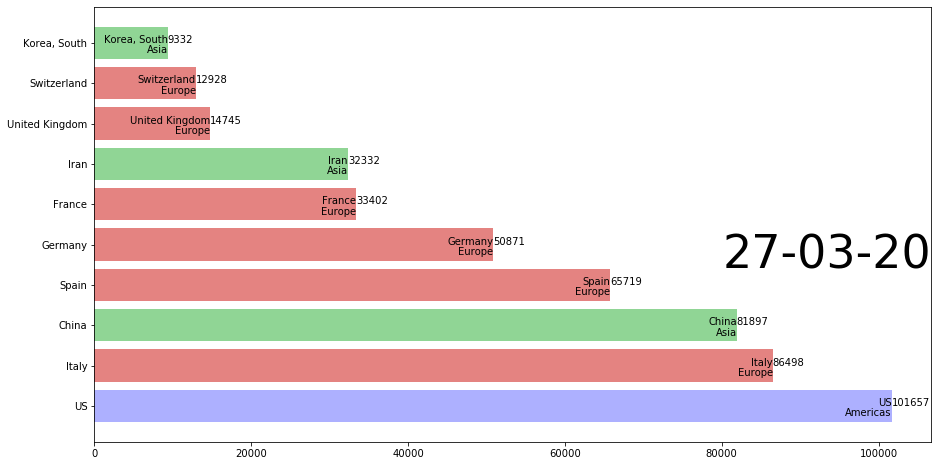

In [60]:
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]
ax.barh(dff['state'], dff['cases'], color=[colors[group_region[x]] for x in dff['state']])
for i, (cases, state) in enumerate(zip(dff['cases'], dff['state'])):
    ax.text(cases, i,     state,            ha='right')
    ax.text(cases, i-.25, group_region[state],  ha='right')
    ax.text(cases, i,     cases, ha='left')
ax.text(1, 0.4, '27-03-20', transform=ax.transAxes, size=46, ha='right')

### Metto tutti gli elementi stilistici che desidero e sostituisco la variabile date a current_date

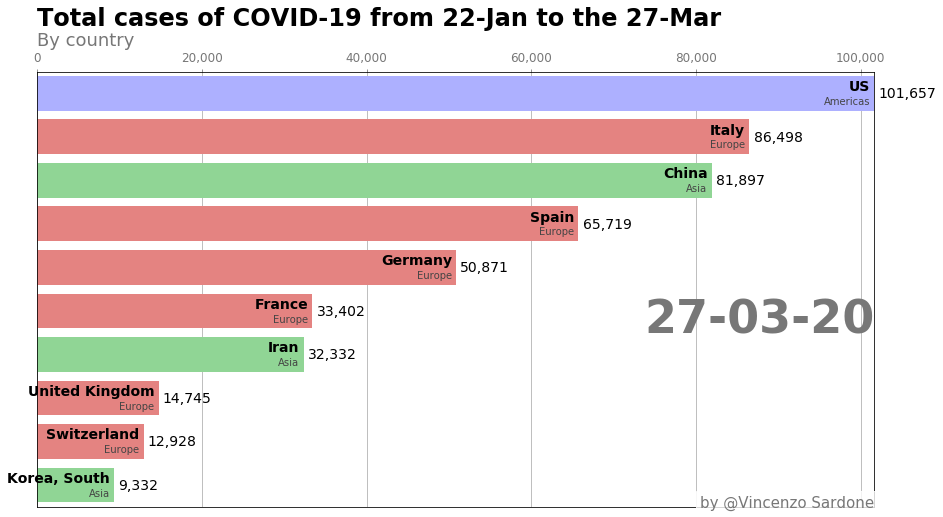

In [61]:
fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(date):
    dff = df[df['date'].eq(date)].sort_values(by='cases', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['state'], dff['cases'], color=[colors[group_region[x]] for x in dff['state']])
    dx = dff['cases'].max() / 200
    for i, (cases, state) in enumerate(zip(dff['cases'], dff['state'])):
        ax.text(cases-dx, i,     state,           size=14, weight=600, ha='right', va='bottom')
        ax.text(cases-dx, i-.25, group_region[state], size=10, color='#444444', ha='right', va='baseline')
        ax.text(cases+dx, i,     f'{cases:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, date, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'By country', transform=ax.transAxes, size=18, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'Total cases of COVID-19 from 22-Jan to the 27-Mar',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    ax.text(1, 0, 'by @Vincenzo Sardone', transform=ax.transAxes, size=15, weight=500, color='#777777', ha='right',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    

draw_barchart('27-03-20')

### Trasformo la colonna del data frame "date" in un lista di valori univoci, in questo modo posso usarla per definire i vari frame da mostrare nella animazione del plot

In [ ]:
date_df = pd.read_csv(url,usecols=['date'])
date_df.head(10)

In [ ]:
date_df['date'].unique()

In [ ]:
date_list = pd.unique(date_df['date']).tolist()

In [ ]:
date_list

### Rendo il grafico animato

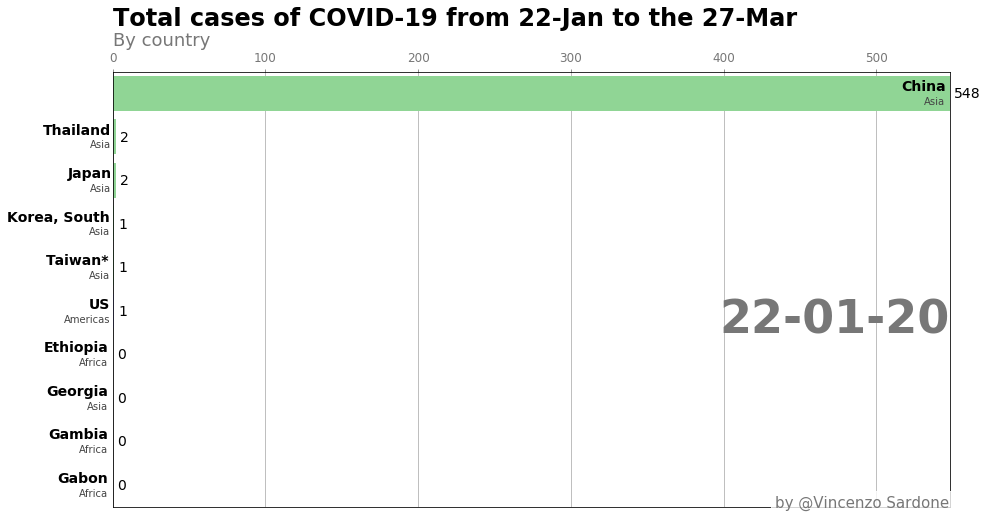

In [62]:
fig,ax = plt.subplots(figsize=(15,8))
animator = animation.FuncAnimation(fig,draw_barchart, frames=date_list, interval=600)
HTML(animator.to_jshtml())

In [92]:
from matplotlib.animation import PillowWriter

animator.save("Covid-19.gif", writer = PillowWriter(fps=1))
